<a href="https://colab.research.google.com/github/Ruqyai/Colab/blob/master/lab_4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading from csv file

# Getting Started

Please download the dataset  from [Dataset download link](https://www.kaggle.com/shivachandel/kc-house-data)




###Import libraries




In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import io

### Upload the dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


###Load the dataset

In [0]:
df = pd.read_csv(io.StringIO(uploaded['kc_house_data.csv'].decode('utf-8')))

##Data Exploration

In [4]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

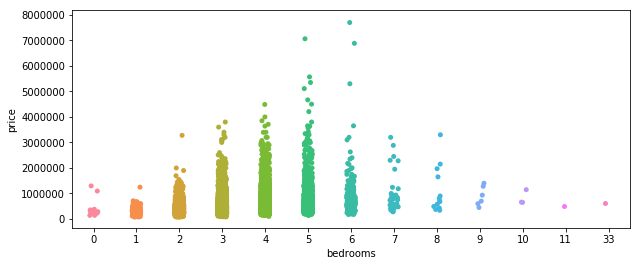

In [7]:

plt.figure(figsize=(10, 4))
sb.stripplot(x="bedrooms", y="price", data=df);

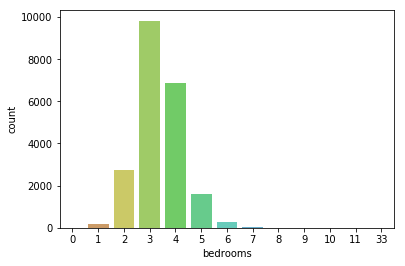

In [8]:
sb.countplot(x='bedrooms',data=df, palette='hls')

In [9]:
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

##Select features

In [10]:
df = df.drop(['id','date', 'lat', 'long','zipcode'], axis =1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503




##Choose the algorithm that you think it is the right



1. **Input data**

In [0]:
columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade','sqft_above', 'sqft_basement', 'yr_built','yr_renovated', 'sqft_living15', 'sqft_lot15']
labels = df['price'].values
features = df[list(columns)].values

2. **Spilt data**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30)
X_train, X_test = X_train / 15129.0, X_test / 15129.0


   3. **Bulid Model**


In [0]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[15], activation="linear")])
                            
                            

4. **Compile the model**

In [0]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

5. **Train the Model**

In [50]:
history = model.fit(X_train, y_train, epochs=10)#, verbose=False)

Epoch 1/10
15129/15129 [==============================] - 0s 28us/sample - loss: 412020640357.8991
Epoch 2/10
15129/15129 [==============================] - 0s 31us/sample - loss: 411851931265.7175
Epoch 3/10
15129/15129 [==============================] - 1s 33us/sample - loss: 411682872981.7521
Epoch 4/10
15129/15129 [==============================] - 0s 33us/sample - loss: 411514249735.2761
Epoch 5/10
15129/15129 [==============================] - 0s 29us/sample - loss: 411345694589.2334
Epoch 6/10
15129/15129 [==============================] - 0s 27us/sample - loss: 411176384235.9823
Epoch 7/10
15129/15129 [==============================] - 0s 27us/sample - loss: 411007564317.6120
Epoch 8/10
15129/15129 [==============================] - 0s 27us/sample - loss: 410838805847.0931
Epoch 9/10
15129/15129 [==============================] - 0s 27us/sample - loss: 410670456724.2462
Epoch 10/10
15129/15129 [==============================] - 0s 27us/sample - loss: 410502279870.0245


6. **Evaluatet accuracy**

In [49]:
model.evaluate(X_test, y_test)

6484/6484 [==============================] - 0s 17us/sample - loss: 428123758122.0086


428123758122.00867

7. **Predict**

In [43]:
x_predict = np.matrix('88,	3.00,	10,	70,	1.0,	0,	0,	5,	7,	10,	10,	19,	0,	13,	50')
y_predict = model.predict(x_predict)
print(y_predict)

[[63375.082]]


8. **Visualize**

No handles with labels found to put in legend.


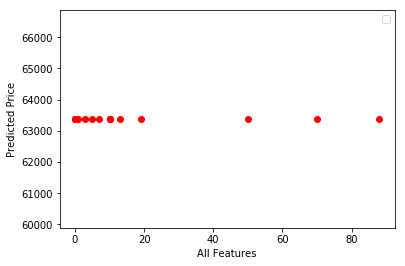

In [51]:
plt.plot(x_predict, y_predict,'ro')
plt.xlabel('All Features')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

dict_keys(['loss'])


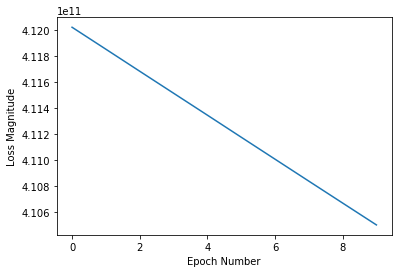

In [61]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

## Let us try another algorithm 

In [25]:
from sklearn import linear_model

regression = linear_model.LinearRegression()

regression.fit(X_train, y_train)

Accuracy = regression.score(X_train, y_train)
print ("Accuracy of the training : ", Accuracy*100)

accuracy = regression.score(X_test, y_test)
print ("Accuracy of the testing : ", accuracy*100)

Accuracy of the training :  65.06940288713713
Accuracy of the testing :  65.92597494235733
